# 🚗 Used Car Price Analysis

**Author**: Saksham Sharma  
**Role**: Aspiring Data Analyst | Stony Brook University  
**Date**: June 2025  
**LinkedIn**: [www.linkedin.com/in/saksham-sharma275](https://linkedin.com/in/saksham-sharma275)  
**GitHub**: [github.com/sakksham27](https://github.com/sakksham27)  
**Email**: sakksham27@gmail.com <br>
**Data source**: [www.kaggle.com/datasets/therohithanand/used-car-price-prediction/data](https://www.kaggle.com/datasets/therohithanand/used-car-price-prediction/data)


---

## 🛠️ Libraries Used

> The following Python libraries were utilized for data preparation, visualization, statistical analysis, and machine learning throughout this project.

- `pandas` – for data loading, manipulation, and DataFrame operations  
- `numpy` – for numerical computations and array transformations  
- `matplotlib.pyplot` – for basic plotting and visualization  
- `seaborn` – for advanced data visualization, including correlation and distribution plots  
- `scipy.stats` – for statistical tests including t-tests, ANOVA, and distribution fitting (`ttest_ind`, `f_oneway`, `gaussian_kde`, `pearsonr`)  
- `scipy` – for general scientific computing tasks  
- `statsmodels.stats.multicomp` – for post-hoc testing (e.g., Tukey’s HSD) after ANOVA  
- `sklearn.linear_model` – for implementing linear regression using `LinearRegression`  
- `sklearn.ensemble` – for building ensemble models like `RandomForestRegressor`  
- `sklearn.pipeline` – for chaining preprocessing and modeling steps using `make_pipeline`  
- `sklearn.preprocessing` – for feature scaling via `StandardScaler`  
- `sklearn.model_selection` – for train/test splitting and validation strategies (`train_test_split`, `KFold`, `cross_val_score`, `cross_validate`)  
- `sklearn.metrics` – for evaluating model performance using `mean_squared_error`, `r2_score`, and custom scorers via `make_scorer`  
- `xgboost` – for training and interpreting gradient-boosted models (`XGBRegressor`) and accessing core functionality via `xgboost as xgb`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind, gaussian_kde , f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from scipy import stats
from scipy.stats import pearsonr
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from statsmodels.stats.outliers_influence import variance_inflation_factor

---

# 🧾 1. Data Import and Preprocessing
---

> This section covers the initial steps of data import, structure inspection, and basic cleaning to ensure consistency and readiness for analysis.


In [2]:
df = pd.read_csv('used_car_price_dataset_extended.csv')

In [3]:
df.head(5)

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,NaN,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,NaN,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes


In [4]:
df.shape

(10000, 12)

In [5]:
df.isnull().sum() # the service_history column has 2038 null values

make_year                0
mileage_kmpl             0
engine_cc                0
fuel_type                0
owner_count              0
price_usd                0
brand                    0
transmission             0
color                    0
service_history       2038
accidents_reported       0
insurance_valid          0
dtype: int64

In [6]:
df['service_history'] = df['service_history'].fillna('Unknown') # NA substitued by Unknown

In [7]:
df.columns 

Index(['make_year', 'mileage_kmpl', 'engine_cc', 'fuel_type', 'owner_count',
       'price_usd', 'brand', 'transmission', 'color', 'service_history',
       'accidents_reported', 'insurance_valid'],
      dtype='object')

---

# 2. 🔍 Exploratory Data Analysis  
---

> A detailed examination of the dataset to uncover key trends, distributions, relationships, and outliers that can inform model development and feature selection.


## **2.1. Trend of Average Car Prices Over Make Years**
The line chart illustrates the average car price (in USD) over different make_year values. A clear upward trend is evident from 1995 to 2023,
indicating that vehicles manufactured in more recent years generally command higher market prices.

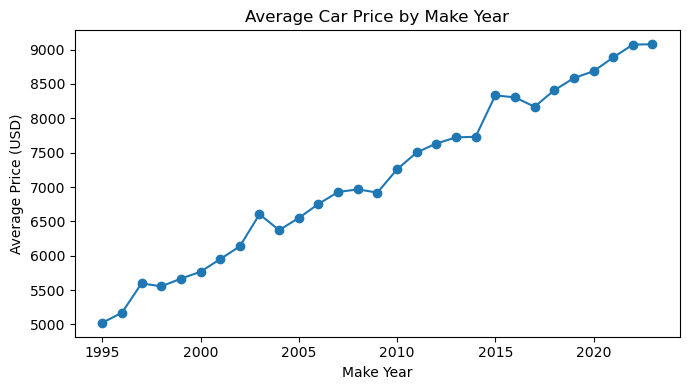

In [8]:
# Group by make_year and calculate average price
avg_price_by_year = df.groupby('make_year')['price_usd'].mean()

# Sort by year for plotting
avg_price_by_year = avg_price_by_year.sort_index()

# Plot
plt.figure(figsize=(7,4))
plt.plot(avg_price_by_year.index, avg_price_by_year.values, marker='o')
plt.title('Average Car Price by Make Year')
plt.xlabel('Make Year')
plt.ylabel('Average Price (USD)')
plt.tight_layout()
plt.show()

### <u>Key Observations: Average Car Price by Make Year</u>

- Average prices increase steadily from **1995-2015**, indicating consistent value growth.
- A sharp rise in prices occurs **after 2015**, suggesting increased demand for newer models and advanced features.
- Prices peak around **2022–2023**, likely influenced by inflation, supply chain constraints, and premium segment growth (**Electric cars**).
- Newer models consistently show higher average prices, reflecting ongoing industry and market shifts.


---

## **2.2. Electric Vehicle Production vs. Mileage Over Time**

A side-by-side comparison showing the yearly count of electric vehicles and the average mileage (km/l) across all car types, highlighting patterns in sustainability and efficiency trends.


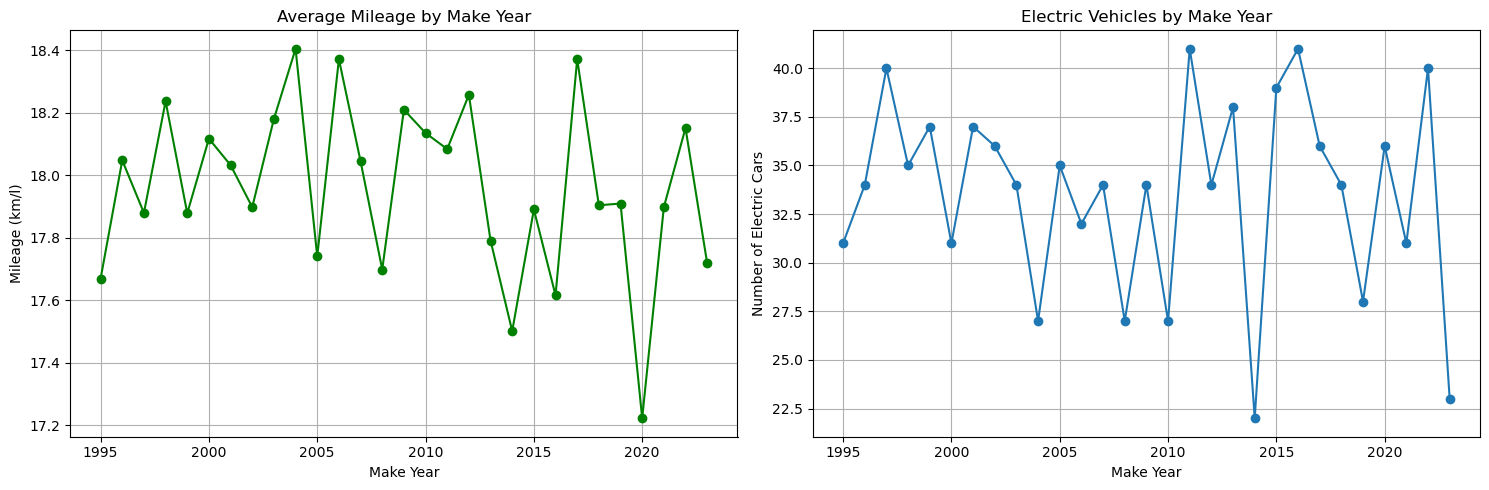

In [9]:
# Electric car count per year
df_electric = df[df['fuel_type'].str.lower() == 'electric']
electric_counts = df_electric['make_year'].value_counts().sort_index()

# Average mileage per year
avg_mileage = df.groupby('make_year')['mileage_kmpl'].mean().sort_index()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot 1: Average mileage by year
axes[0].plot(avg_mileage.index, avg_mileage.values, marker='o', linestyle='-', color='green')
axes[0].set_title('Average Mileage by Make Year')
axes[0].set_xlabel('Make Year')
axes[0].set_ylabel('Mileage (km/l)')
axes[0].grid(True)

# Plot 2: Electric cars by year
axes[1].plot(electric_counts.index, electric_counts.values, marker='o', linestyle='-')
axes[1].set_title('Electric Vehicles by Make Year')
axes[1].set_xlabel('Make Year')
axes[1].set_ylabel('Number of Electric Cars')
axes[1].grid(True)

plt.tight_layout()
plt.show()

### <u>Key Observations:</u>

- Both graphs display similar fluctuation patterns over time, indicating a potential relationship between fuel efficiency and electric vehicle production volumes.
- A noticeable decline in **average mileage** begins after **2012**, continuing through **2020**, suggesting a shift in focus away from fuel efficiency improvements.
- The **number of electric vehicles** also fluctuates significantly post-2012, with sharp drops observed in **2013-14** and **2017-19**, potentially tied to R&D cycles, regulatory changes, or supply chain constraints.
- Peaks in electric vehicle production around **2011**, **2016**, and **2021** suggest intermittent surges in innovation or market pushes, rather than sustained growth.
- The lack of a strong upward trend in either mileage or EV production implies that long-term investments in fuel efficiency and electrification may be inconsistent across manufacturers.


---

## **2.3. Average Mileage by Engine Displacement (CC)**

This chart illustrates how fuel efficiency varies with engine size, highlighting an optimal range around 3000 cc before mileage declines at higher capacities.


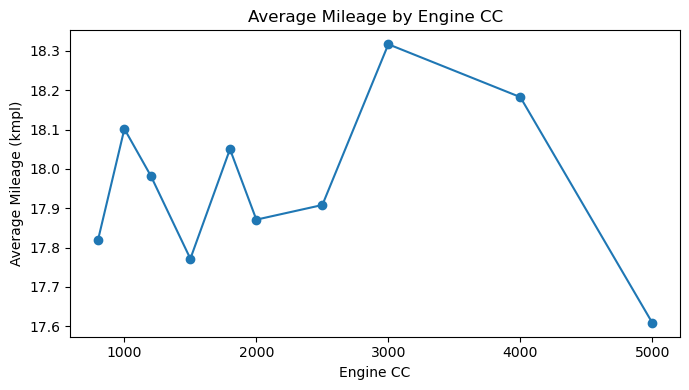

In [10]:
# Average Mileage per Engine cc in sorted index
df_engine_cc = df.groupby('engine_cc')['mileage_kmpl'].mean().sort_index()

# Plot
plt.figure(figsize=(7,4))
plt.plot(df_engine_cc.index, df_engine_cc.values, marker='o')
plt.title('Average Mileage by Engine CC')
plt.xlabel('Engine CC')
plt.ylabel('Average Mileage (kmpl)')
plt.tight_layout()
plt.show()

### <u> Key Observations: Average Mileage by Engine CC:</u>

- Mileage is highly variable in lower engine capacities (<2000 cc), likely due to differences in tuning, weight, and drivetrain efficiency.
- An optimal mileage peak appears around 3000 cc, suggesting a balance between power and efficiency in mid-range engines.
- Beyond 3000–3500 cc, mileage consistently declines — larger engines consume more fuel to produce additional power, reducing efficiency.
- According to automotive sources, such as **[dubizzle](https://www.dubizzle.com/blog/cars/is-higher-cc-engine-better-cars/)**, higher cc engines are designed for performance, not economy, often leading to lower fuel efficiency at the cost of increased torque and acceleration.
- The graph supports this mechanical principle — cars with very high cc values (>4000) deliver more power but at the expense of fuel economy.


---

## **2.4. Total Reported Accidents by Service History and Transmission Type**

This side-by-side comparison highlights accident patterns based on vehicle maintenance history and transmission type, revealing notable disparities in both categories.


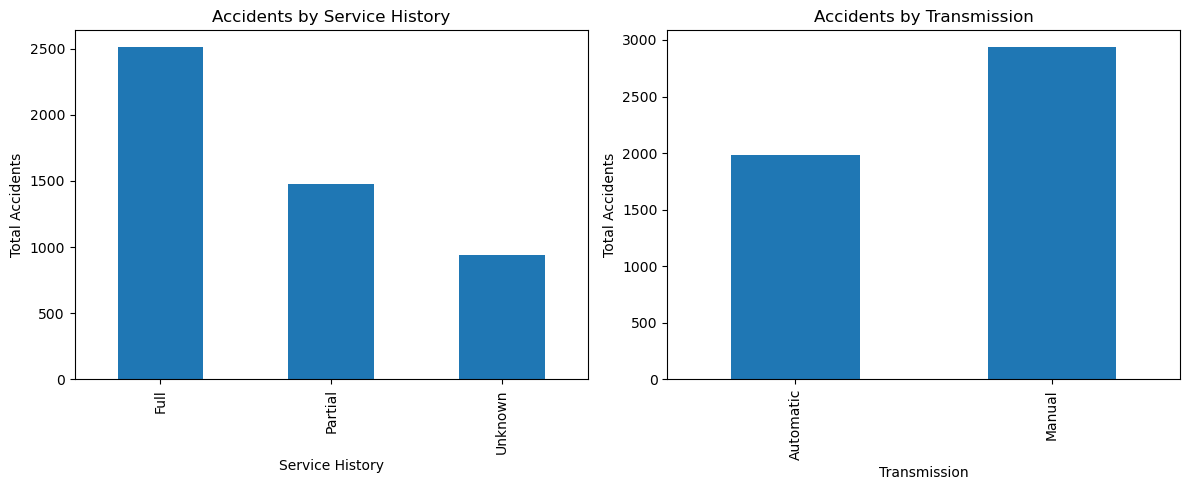

In [11]:
df_service = df.groupby('service_history')['accidents_reported'].sum().sort_index()
df_transmission = df.groupby('transmission')['accidents_reported'].sum().sort_values()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot 1: Service History
df_service.plot(kind='bar', ax=axes[0])
axes[0].set_title('Accidents by Service History')
axes[0].set_xlabel('Service History')
axes[0].set_ylabel('Total Accidents')

# Plot 2: Transmission
df_transmission.plot(kind='bar', ax=axes[1])
axes[1].set_title('Accidents by Transmission')
axes[1].set_xlabel('Transmission')
axes[1].set_ylabel('Total Accidents')

plt.tight_layout()
plt.show()


### <u>Key Observations:</u>

- Vehicles with a **full service history** account for the highest number of reported accidents, followed by **partially serviced** and **unknown** categories.
- This finding suggests that regular servicing does not necessarily correlate with lower accident incidence and may reflect higher usage or better reporting practices.
- Manual transmission vehicles have a total of **2,938 accidents**, while automatic vehicles report **1,984 accidents**.
- This represents a **48% higher accident count** for manual vehicles compared to automatic ones.
- The disparity may be influenced by user demographics, vehicle age, driving habits, or broader market composition.


---

 ## **2.5. Yearly Car Production Trend Analysis**

The line chart visualizes the number of cars produced each year based on the make_year feature. 

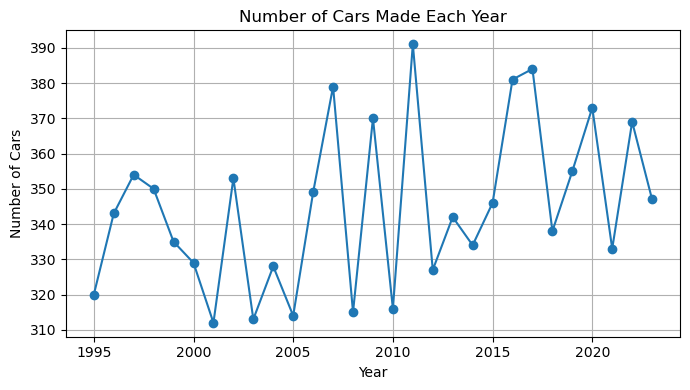

In [12]:
# number of cars each year

year_counts = df['make_year'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(7,4))
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.title('Number of Cars Made Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.tight_layout()
plt.show()

### <u>Key Observations:</u>
- Production volume fluctuated significantly between **2005 and 2012**.
- The years 2010–2012 saw a sharp increase, with over **70 additional** units produced.
- This peak likely reflects elevated demand or expanded manufacturing capacity.
- A post-2012 decline suggests possible economic or supply chain disruptions.


---

# ⚖️ 3. Statistical Analysis: Influence of Categorical Features on Price
---

>This section applies methods such as T-test, ANOVA, and Tukey HSD HSD to assess whether categorical features like transmission, service history, and insurance validity have a statistically significant impact on vehicle pricing.


## 3.1. Distribution & Normality Check: Transmission vs Price

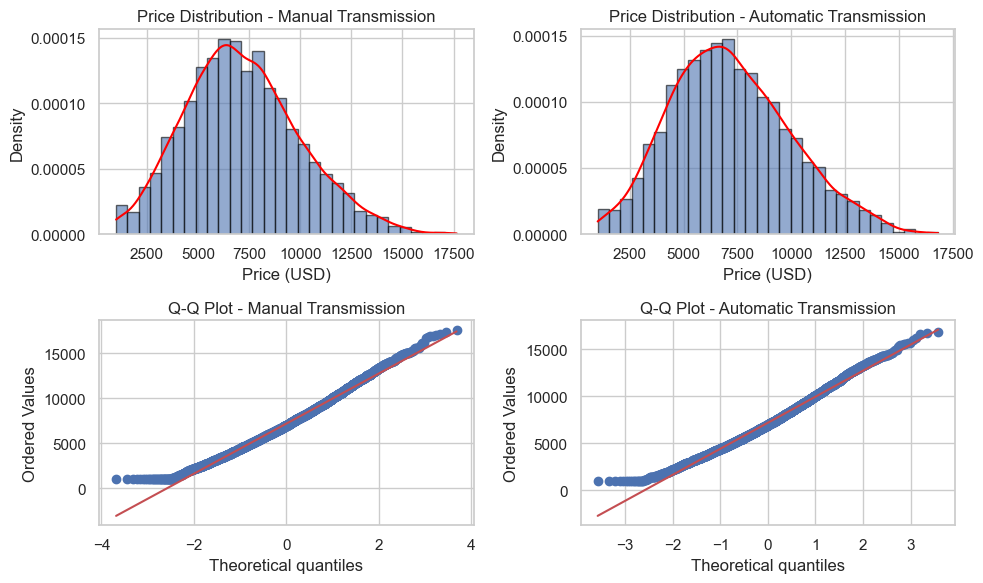

In [13]:
sns.set_theme(style="whitegrid")

# Create 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# --- Histogram: Manual Transmission ---
manual_prices = df[df['transmission'] == 'Manual']['price_usd']
axes[0, 0].hist(manual_prices, bins=30, edgecolor='black', alpha=0.6, density=True)
density_manual = gaussian_kde(manual_prices)
x_manual = np.linspace(min(manual_prices), max(manual_prices), 300)
axes[0, 0].plot(x_manual, density_manual(x_manual), color='red')
axes[0, 0].set_title('Price Distribution - Manual Transmission')
axes[0, 0].set_xlabel('Price (USD)')
axes[0, 0].set_ylabel('Density')

# --- Histogram: Automatic Transmission ---
auto_prices = df[df['transmission'] == 'Automatic']['price_usd']
axes[0, 1].hist(auto_prices, bins=30, edgecolor='black', alpha=0.6, density=True)
density_auto = gaussian_kde(auto_prices)
x_auto = np.linspace(min(auto_prices), max(auto_prices), 300)
axes[0, 1].plot(x_auto, density_auto(x_auto), color='red')
axes[0, 1].set_title('Price Distribution - Automatic Transmission')
axes[0, 1].set_xlabel('Price (USD)')
axes[0, 1].set_ylabel('Density')

# --- Q-Q Plot: Manual Transmission ---
stats.probplot(manual_prices, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot - Manual Transmission')

# --- Q-Q Plot: Automatic Transmission ---
stats.probplot(auto_prices, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot - Automatic Transmission')

# Tight layout for clean display
plt.tight_layout()
plt.show()

#### Key Observations: Distribution Assessment by Transmission Type

- The histogram and Q-Q plots for both manual and automatic transmission groups indicate that the price distributions are **approximately normal**, justifying the use of a **T-test** for statistical significance testing.
- Both groups show a reasonably symmetric bell-shaped curve, although the automatic transmission group exhibits **slight left skewness**, particularly in the price range 5000-7500 usd.
- This skewness suggests that **scaling or transformation** (e.g., log transformation) may be beneficial prior to applying modeling techniques.

In [14]:
manual_prices = df[df['transmission'] == 'Manual']['price_usd']
auto_prices = df[df['transmission'] == 'Automatic']['price_usd']

# Apply Welch's T-test (does not assume equal variance)
t_stat, p_value = ttest_ind(manual_prices, auto_prices, equal_var=False)

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -0.28
P-value: 0.7815


The t-test results indicat no statistically significant difference in mean prices between manual & automatic transmissions.<br>
**Transmission type does not influence price** in this dataset and can be excluded from modeling.

---

## 3.2. Distribution & Normality Check: insurance validity vs Price

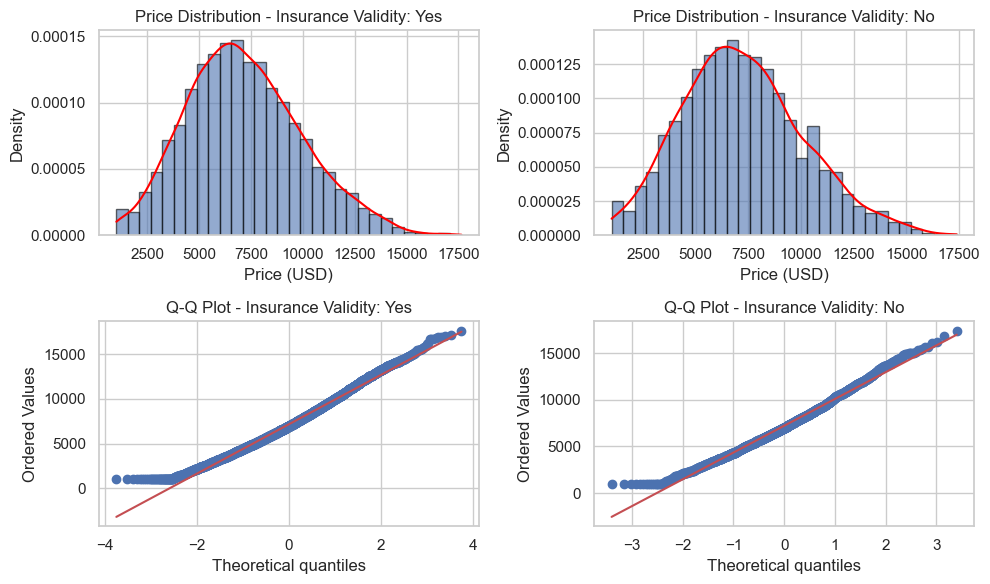

In [15]:
sns.set_theme(style="whitegrid")

# Create 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# --- Histogram: Insurance validity ---
yes_validity_prices = df[df['insurance_valid'] == 'Yes']['price_usd']
axes[0, 0].hist(yes_validity_prices, bins=30, edgecolor='black', alpha=0.6, density=True)
density_yes = gaussian_kde(yes_validity_prices)
x_yes = np.linspace(min(yes_validity_prices), max(yes_validity_prices), 300)
axes[0, 0].plot(x_yes, density_yes(x_yes), color='red')  # FIXED
axes[0, 0].set_title('Price Distribution - Insurance Validity: Yes')
axes[0, 0].set_xlabel('Price (USD)')
axes[0, 0].set_ylabel('Density')

# --- Histogram: Insurance validity ---
no_validity_prices = df[df['insurance_valid'] == 'No']['price_usd']
axes[0, 1].hist(no_validity_prices, bins=30, edgecolor='black', alpha=0.6, density=True)
density_no = gaussian_kde(no_validity_prices)
x_no = np.linspace(min(no_validity_prices), max(no_validity_prices), 300)
axes[0, 1].plot(x_no, density_no(x_no), color='red')  # FIXED
axes[0, 1].set_title('Price Distribution - Insurance Validity: No')
axes[0, 1].set_xlabel('Price (USD)')
axes[0, 1].set_ylabel('Density')

# --- Q-Q Plot:  --- Insurance Validity: Yes
stats.probplot(yes_validity_prices, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot - Insurance Validity: Yes')

# --- Q-Q Plot: Insurance Validity: No ---
stats.probplot(no_validity_prices, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot - Insurance Validity: No')

# Tight layout for clean display
plt.tight_layout()
plt.show()

#### Key Observations: Distribution Assessment by Insurance Validity

- The histogram and Q-Q plots for both Yes and No groups indicate approximate normality, supporting the use of a T-test for mean comparison.
- Both distributions exhibit a mild **left skew**, especially visible in the **lower-value deviations** on the Q-Q plots.
- This skewness suggests that applying a scaling or log transformation may improve model performance in downstream tasks.

---

## 3.3. Distribution & Normality Analysis: Fuel Type vs Price — Noteworthy Trends Observed

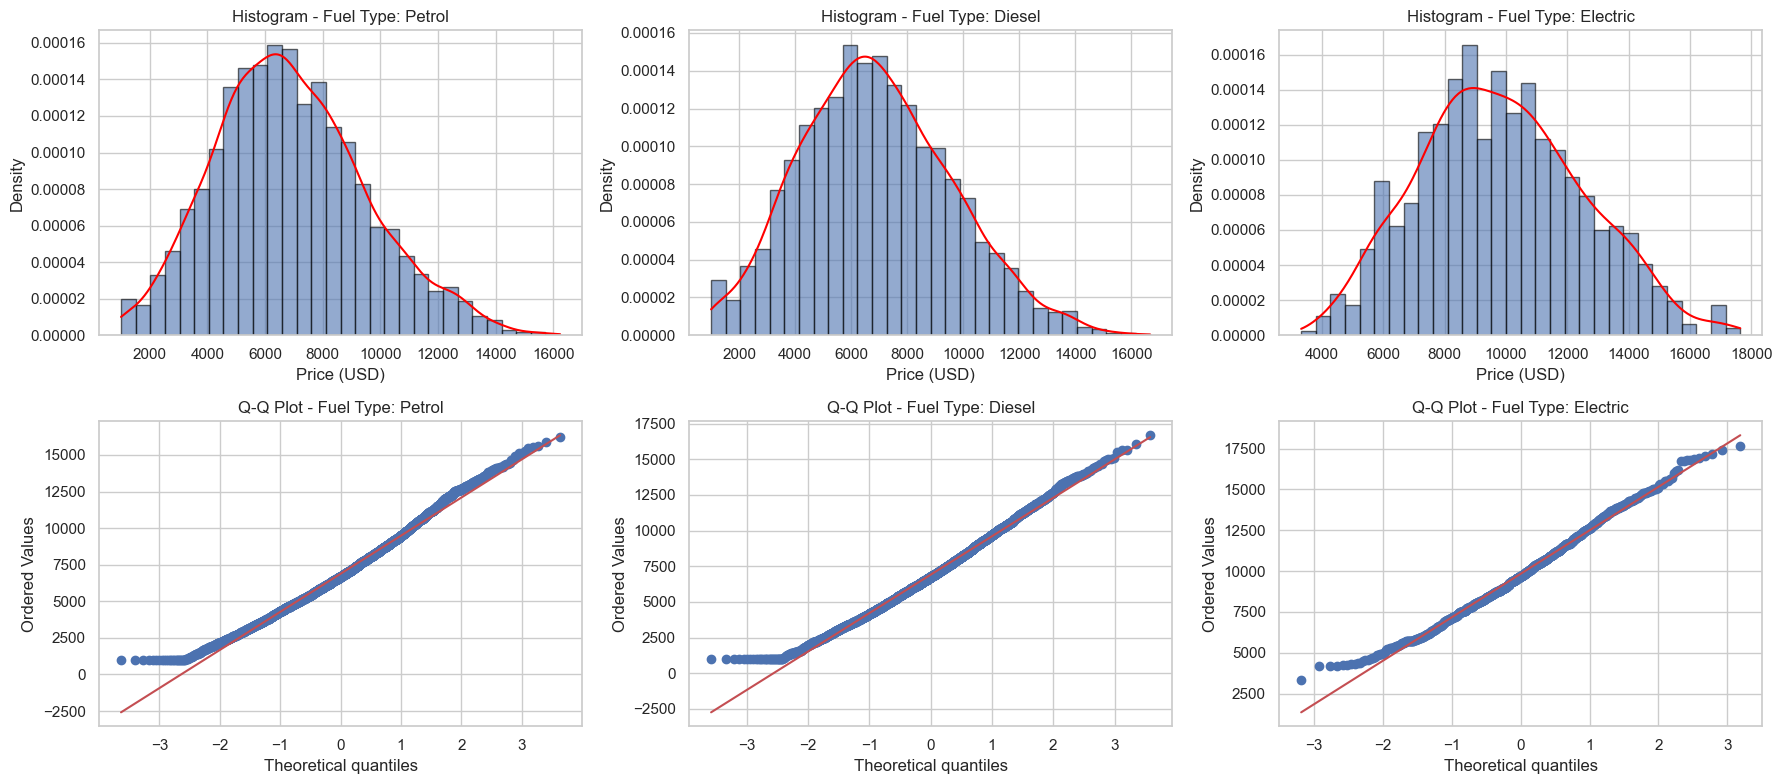

In [16]:
sns.set_theme(style="whitegrid")

# Create 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(18, 8))  # wider for better spacing

# --- Histogram: Fuel Type — Petrol ---
petrol_prices = df[df['fuel_type'] == 'Petrol']['price_usd']
axes[0, 0].hist(petrol_prices, bins=30, edgecolor='black', alpha=0.6, density=True)
density_petrol = gaussian_kde(petrol_prices)
x_petrol = np.linspace(min(petrol_prices), max(petrol_prices), 300)
axes[0, 0].plot(x_petrol, density_petrol(x_petrol), color='red')
axes[0, 0].set_title('Histogram - Fuel Type: Petrol')
axes[0, 0].set_xlabel('Price (USD)')
axes[0, 0].set_ylabel('Density')

# --- Histogram: Fuel Type — Diesel ---
diesel_prices = df[df['fuel_type'] == 'Diesel']['price_usd']
axes[0, 1].hist(diesel_prices, bins=30, edgecolor='black', alpha=0.6, density=True)
density_diesel = gaussian_kde(diesel_prices)
x_diesel = np.linspace(min(diesel_prices), max(diesel_prices), 300)
axes[0, 1].plot(x_diesel, density_diesel(x_diesel), color='red')
axes[0, 1].set_title('Histogram - Fuel Type: Diesel')
axes[0, 1].set_xlabel('Price (USD)')
axes[0, 1].set_ylabel('Density')

# --- Histogram: Fuel Type — Electric ---
electric_prices = df[df['fuel_type'] == 'Electric']['price_usd']
axes[0, 2].hist(electric_prices, bins=30, edgecolor='black', alpha=0.6, density=True)
density_electric = gaussian_kde(electric_prices)
x_electric = np.linspace(min(electric_prices), max(electric_prices), 300)
axes[0, 2].plot(x_electric, density_electric(x_electric), color='red')
axes[0, 2].set_title('Histogram - Fuel Type: Electric')
axes[0, 2].set_xlabel('Price (USD)')
axes[0, 2].set_ylabel('Density')

# --- Q-Q Plot: Fuel Type — Petrol ---
stats.probplot(petrol_prices, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot - Fuel Type: Petrol')

# --- Q-Q Plot: Fuel Type — Diesel ---
stats.probplot(diesel_prices, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot - Fuel Type: Diesel')

# --- Q-Q Plot: Fuel Type — Electric ---
stats.probplot(electric_prices, dist="norm", plot=axes[1, 2])
axes[1, 2].set_title('Q-Q Plot - Fuel Type: Electric')

plt.tight_layout()
plt.show()

In [17]:
# --- ANOVA for Fuel Type ---
groups_fuel = [group['price_usd'].dropna() for name, group in df.groupby('fuel_type')]
anova_result_fuel = f_oneway(*groups_fuel)
print("ANOVA Result for Fuel Type:")
print(f"F-statistic: {anova_result_fuel.statistic:.4f}, P-value: {anova_result_fuel.pvalue:.4f}")

ANOVA Result for Fuel Type:
F-statistic: 541.4155, P-value: 0.0000


In [18]:
tukey = pairwise_tukeyhsd(endog=df['price_usd'], groups=df['fuel_type'], alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1   group2   meandiff  p-adj    lower      upper    reject
----------------------------------------------------------------
  Diesel Electric  2931.7422    0.0  2709.6479  3153.8365   True
  Diesel   Petrol   -27.2466 0.8785   -158.952   104.4587  False
Electric   Petrol -2958.9888    0.0 -3177.1104 -2740.8672   True
----------------------------------------------------------------


#### Key Observations: 
- ANOVA test confirmed a significant difference in average prices across fuel types (F = 541.42, p < 0.0001).
- Tukey HSD showed Electric cars have significantly higher prices than Petrol and Diesel vehicles.
- Fuel type is a strong predictor of price and should be prioritized in modeling and pricing strategies.

---

## 3.4. Distribution & Normality Analysis: Service History vs Price 

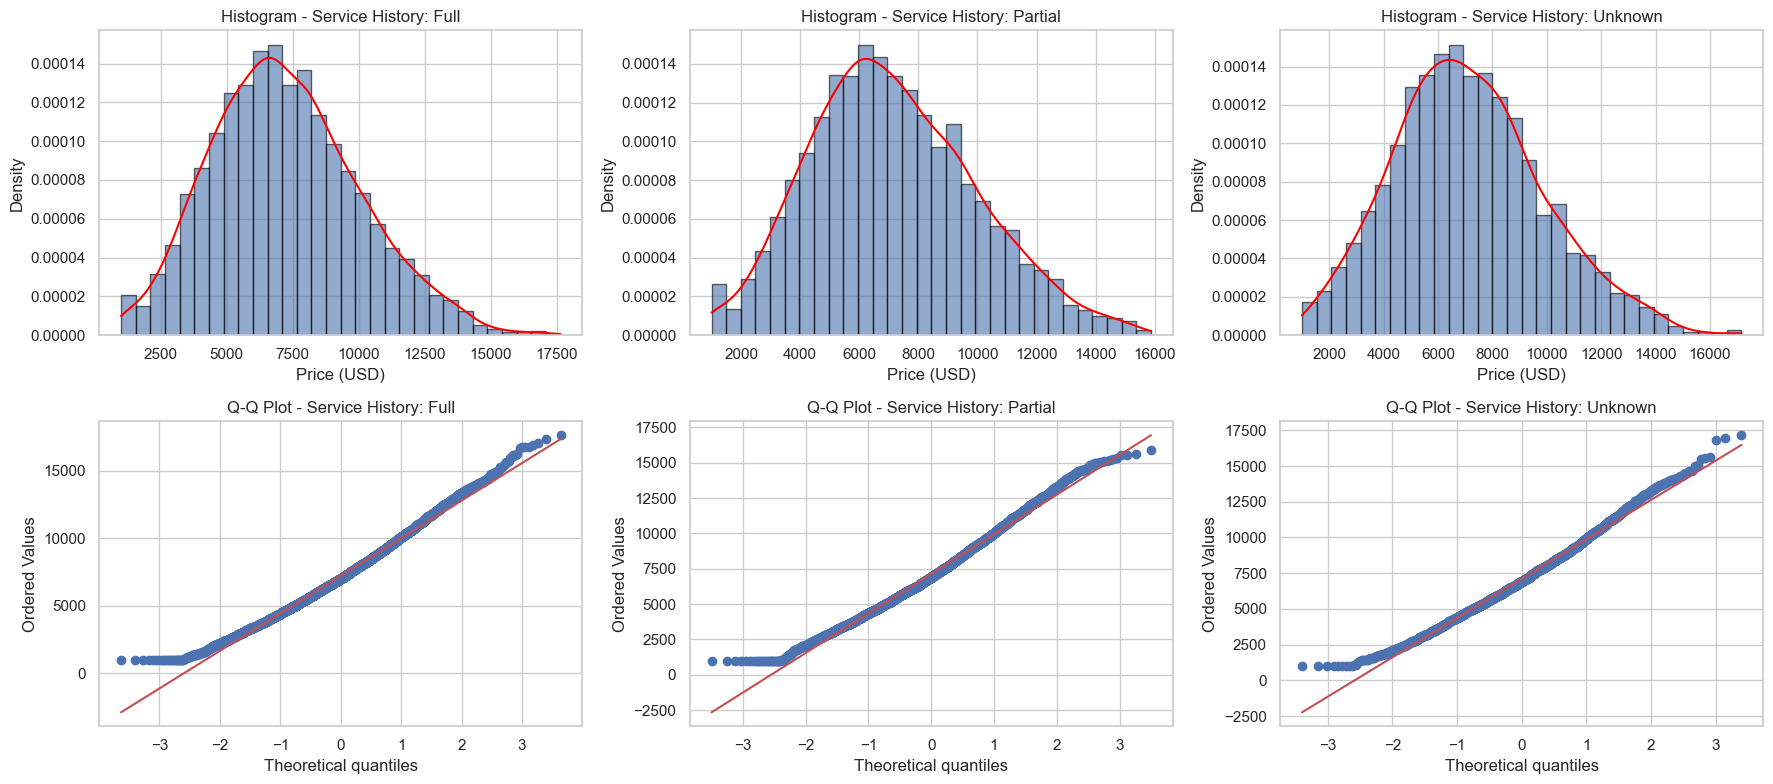

In [19]:
sns.set_theme(style="whitegrid")

# Create 2x3 grid (3 categories × 2 rows: histograms + Q-Q plots)
fig, axes = plt.subplots(2, 3, figsize=(18, 8))

# --- Histogram: Service History — Full ---
full_prices = df[df['service_history'] == 'Full']['price_usd']
axes[0, 0].hist(full_prices, bins=30, edgecolor='black', alpha=0.6, density=True)
density_full = gaussian_kde(full_prices)
x_full = np.linspace(min(full_prices), max(full_prices), 300)
axes[0, 0].plot(x_full, density_full(x_full), color='red')
axes[0, 0].set_title('Histogram - Service History: Full')
axes[0, 0].set_xlabel('Price (USD)')
axes[0, 0].set_ylabel('Density')

# --- Histogram: Service History — Partial ---
partial_prices = df[df['service_history'] == 'Partial']['price_usd']
axes[0, 1].hist(partial_prices, bins=30, edgecolor='black', alpha=0.6, density=True)
density_partial = gaussian_kde(partial_prices)
x_partial = np.linspace(min(partial_prices), max(partial_prices), 300)
axes[0, 1].plot(x_partial, density_partial(x_partial), color='red')
axes[0, 1].set_title('Histogram - Service History: Partial')
axes[0, 1].set_xlabel('Price (USD)')
axes[0, 1].set_ylabel('Density')

# --- Histogram: Service History — Unknown ---
unknown_prices = df[df['service_history'] == 'Unknown']['price_usd']
axes[0, 2].hist(unknown_prices, bins=30, edgecolor='black', alpha=0.6, density=True)
density_unknown = gaussian_kde(unknown_prices)
x_unknown = np.linspace(min(unknown_prices), max(unknown_prices), 300)
axes[0, 2].plot(x_unknown, density_unknown(x_unknown), color='red')
axes[0, 2].set_title('Histogram - Service History: Unknown')
axes[0, 2].set_xlabel('Price (USD)')
axes[0, 2].set_ylabel('Density')

# --- Q-Q Plot: Service History — Full ---
stats.probplot(full_prices, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot - Service History: Full')

# --- Q-Q Plot: Service History — Partial ---
stats.probplot(partial_prices, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot - Service History: Partial')

# --- Q-Q Plot: Service History — Unknown ---
stats.probplot(unknown_prices, dist="norm", plot=axes[1, 2])
axes[1, 2].set_title('Q-Q Plot - Service History: Unknown')

plt.tight_layout()
plt.show()


In [20]:
# --- ANOVA for Service History ---
groups_service = [group['price_usd'].dropna() for name, group in df.groupby('service_history')]
anova_result_service = f_oneway(*groups_service)
print("\nANOVA Result for Service History:")
print(f"F-statistic: {anova_result_service.statistic:.4f}, P-value: {anova_result_service.pvalue:.4f}")


ANOVA Result for Service History:
F-statistic: 1.3349, P-value: 0.2632


#### Key Observations: 
- ANOVA test showed **no statistically significant difference** in average prices across service history groups (F = 1.33, p = 0.2632).
- The results indicate that service history **does not** have a measurable impact on used car prices in this dataset.

---

# 4. 📊 Graphical Analysis: Categorical Features and Price Behavior
---
>This dashboard visualizes how categorical features influence vehicle pricing, guiding decisions on feature selection for modeling.


## **4.1. Price Behavior Across Key Categorical Variables**

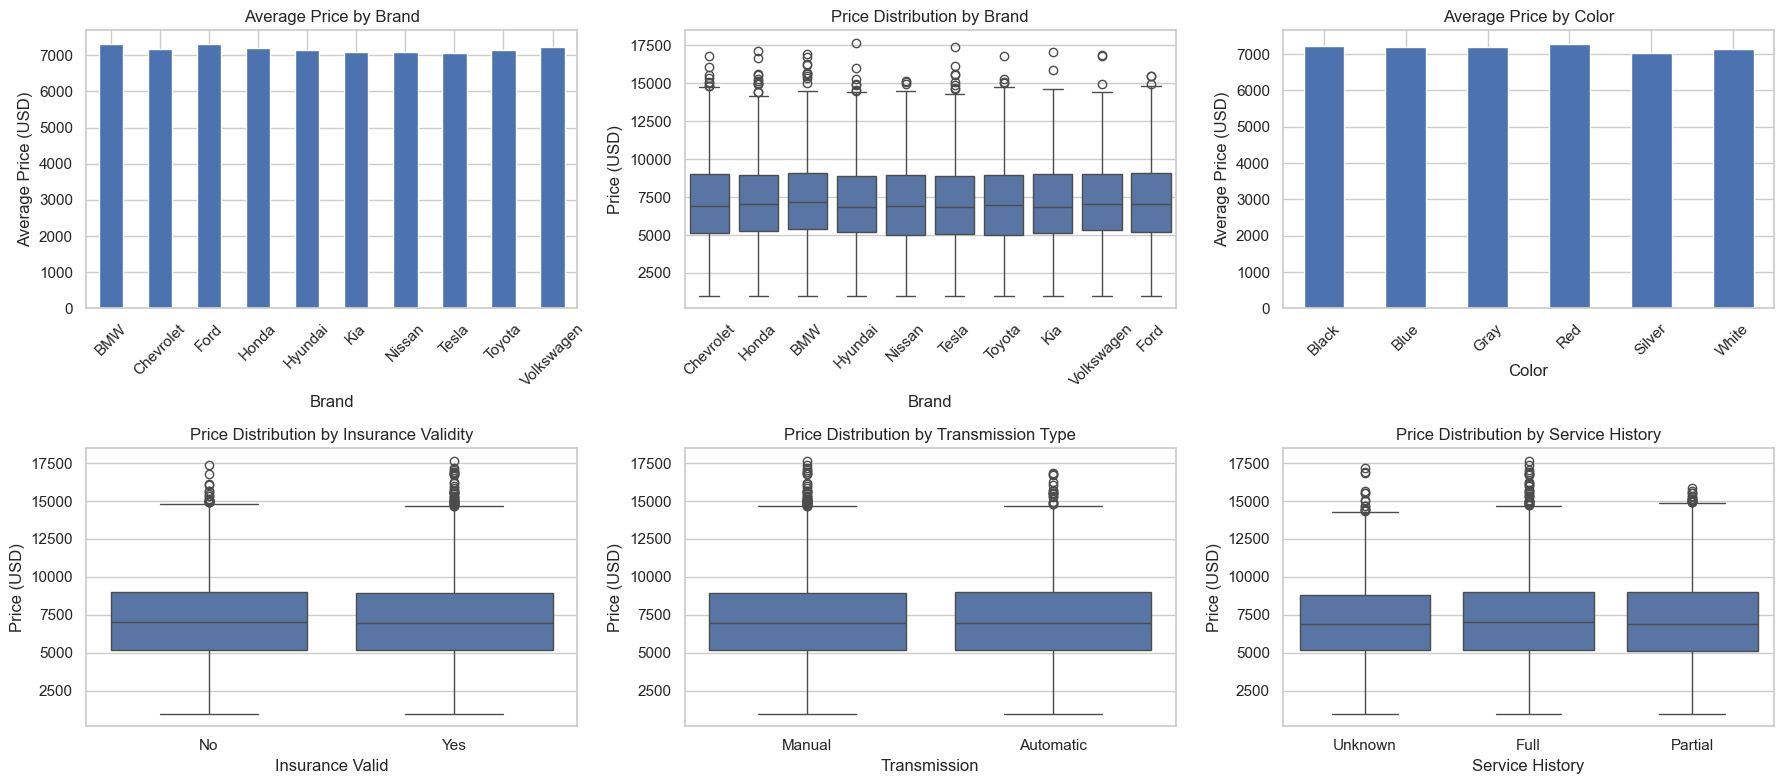

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Optional: clean whitegrid styling
sns.set_theme(style="whitegrid")

# Prepare data
df_brand_avg_price = df.groupby('brand')['price_usd'].mean().sort_index()
df_color_avg_price = df.groupby('color')['price_usd'].mean().sort_index()

# Create 2 rows x 3 columns layout
fig, axes = plt.subplots(2, 3, figsize=(18, 8))

### ROW 1 ###
# Plot 1: Average price by brand
df_brand_avg_price.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Average Price by Brand')
axes[0, 0].set_xlabel('Brand')
axes[0, 0].set_ylabel('Average Price (USD)')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Price distribution by brand
sns.boxplot(x='brand', y='price_usd', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Price Distribution by Brand')
axes[0, 1].set_xlabel('Brand')
axes[0, 1].set_ylabel('Price (USD)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Average price by color
df_color_avg_price.plot(kind='bar', ax=axes[0, 2])
axes[0, 2].set_title('Average Price by Color')
axes[0, 2].set_xlabel('Color')
axes[0, 2].set_ylabel('Average Price (USD)')
axes[0, 2].tick_params(axis='x', rotation=45)

### ROW 2 ###
# Plot 4: Price distribution by insurance validity
sns.boxplot(x='insurance_valid', y='price_usd', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Price Distribution by Insurance Validity')
axes[1, 0].set_xlabel('Insurance Valid')
axes[1, 0].set_ylabel('Price (USD)')

# Plot 5: Price distribution by transmission
sns.boxplot(x='transmission', y='price_usd', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Price Distribution by Transmission Type')
axes[1, 1].set_xlabel('Transmission')
axes[1, 1].set_ylabel('Price (USD)')

# Plot 6: Price distribution by service history
sns.boxplot(x='service_history', y='price_usd', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Price Distribution by Service History')
axes[1, 2].set_xlabel('Service History')
axes[1, 2].set_ylabel('Price (USD)')

# Clean layout
plt.tight_layout()
plt.show()


### Key Observations: Categorical Features vs Price

- **Brand**  
  - Average prices across top brands are generally consistent, with minor variation.  
  - Boxplots confirm overlapping distributions, indicating brand has limited standalone impact on price.  

- **Color**  
  - Average prices by color show negligible differences.  
  - This suggests that `color` is likely not a strong predictor of price and can be excluded from modeling.

- **Insurance Validity**  
  - Boxplot shows similar price distributions for both insured and uninsured vehicles.  
  - A statistical test (p = 0.4873) confirms the difference is not significant.

- **Transmission**  
  - Price distributions for manual and automatic cars are nearly identical.  
  - T-test results (p = 0.7815) indicate that `transmission` does not meaningfully influence price in this dataset.

- **Service History**  
  - Boxplot suggests little to no difference in pricing across service levels.  
  - A Kruskal-Wallis test (p = 0.2804) confirms this feature is not statistically significant.

#### Conclusion:
Among the evaluated categorical features, **none demonstrate strong or significant impact on vehicle price**, with the possible exception of brand (which may still be useful if reduced to top categories). Remaining features can likely be **excluded or carefully encoded** if retained.


---

## **4.2. Price Distribution by Fuel Type**

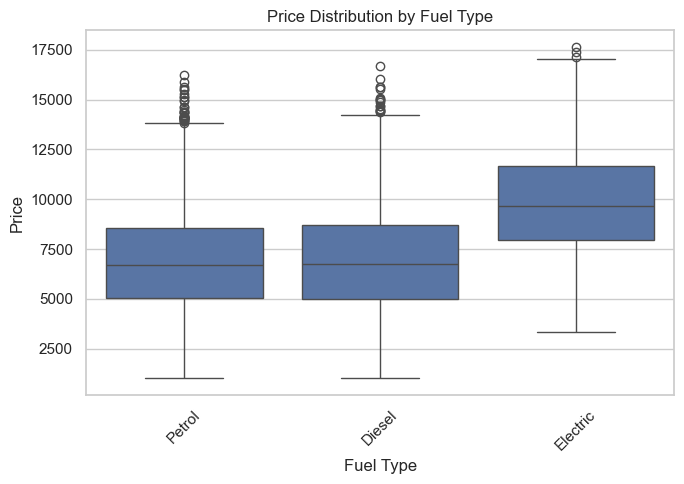

In [22]:
# 4.1. Price Behavior Across Key Categorical Variables

# Boxplot to visualize price distribution across fuel types
plt.figure(figsize=(7,5))
sns.boxplot(x='fuel_type', y='price_usd', data=df)

plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Key Observations: Price Distribution by Fuel Type

- Electric vehicles show higher prices, with both median and upper quartile above petrol and diesel.
- This positions EVs as premium offerings in the current market.
- Petrol and diesel vehicles have similar price distributions with significant overlap.
- Both fuel types include high-value outliers, likely representing luxury or performance models.
- Fuel type clearly influences pricing and should be considered a key predictive feature in modeling.
- The boxplot results align perfectly with the statistical analysis.


---

## **4.3. Correlation Analysis Summary**

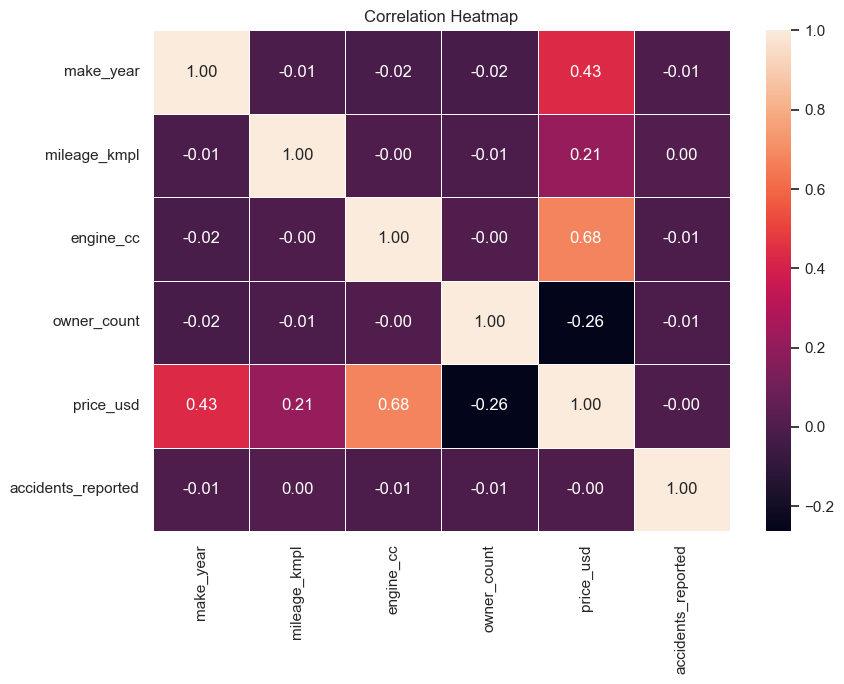

In [23]:
corr_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(9, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

### Key Observations: Correlation Heatmap

- `engine_cc` shows a strong positive correlation with `price_usd` (0.68), indicating that vehicles with larger engines are generally more expensive.
- `make_year` is moderately correlated with `price_usd` (0.43), suggesting newer vehicles tend to be priced higher.
- `owner_count` is negatively correlated with `price_usd` (-0.26), reflecting depreciation due to multiple previous owners.
- `mileage_kmpl` shows a weak positive correlation with `price_usd` (0.21), implying minor influence of fuel efficiency on price.
- No significant correlations are observed with `accidents_reported`, suggesting that accident history does not strongly affect price in this dataset.
- Overall, `engine_cc`, `make_year`,`owner_count` and `owner_count` emerge as the most influential features related to pricing.


---

#### 4.3.1. Features displaying strong positive correlation: 

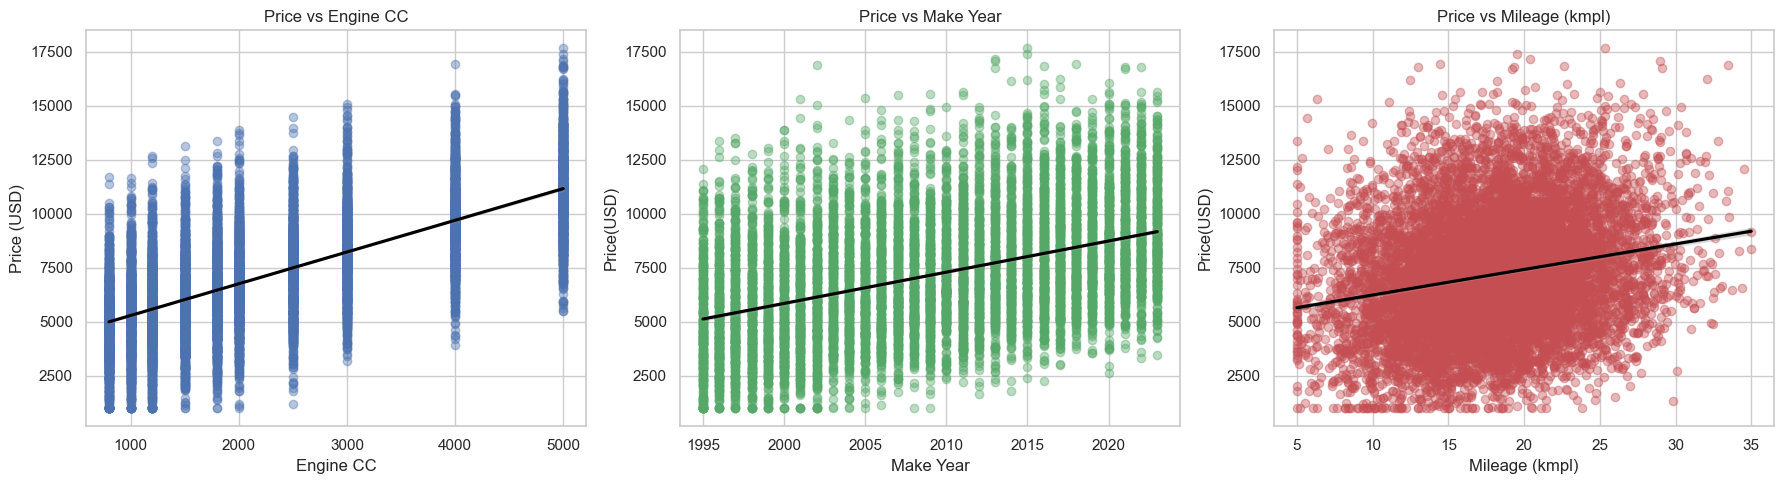

In [24]:
# Using Custom colors to enhance appearance and readablity 
scatter_colors = ['#4C72B0', '#55A868', '#C44E52']
line_colors = ['black']  # Slightly darker variants

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Engine CC vs Price
sns.regplot(
    x='engine_cc', y='price_usd', data=df,
    scatter_kws={'alpha': 0.4, 'color': scatter_colors[0]},
    line_kws={'color': line_colors[0]},
    ax=axes[0]
)
axes[0].set_title('Price vs Engine CC')
axes[0].set_xlabel('Engine CC')
axes[0].set_ylabel('Price (USD)')

# Plot 2: Make Year vs Price
sns.regplot(
    x='make_year', y='price_usd', data=df,
    scatter_kws={'alpha': 0.4, 'color': scatter_colors[1]},
    line_kws={'color': line_colors[0]},
    ax=axes[1]
)
axes[1].set_title('Price vs Make Year')
axes[1].set_xlabel('Make Year')
axes[1].set_ylabel('Price(USD)')

# Plot 3: Mileage vs Price
sns.regplot(
    x='mileage_kmpl', y='price_usd', data=df,
    scatter_kws={'alpha': 0.4, 'color': scatter_colors[2]},
    line_kws={'color': line_colors[0]},
    ax=axes[2]
)
axes[2].set_title('Price vs Mileage (kmpl)')
axes[2].set_xlabel('Mileage (kmpl)')
axes[2].set_ylabel('Price(USD)')

plt.tight_layout()
plt.show()


### Key Observations: 
- Engine CC, Make Year, and Mileage all show a clear positive linear relationship with price_usd.
- This suggests that newer, more powerful, and fuel-efficient cars tend to be priced higher.
- These variables are strong predictors and should be prioritized in regression models.

---

#### 4.3.2. Features displaying strong negative correlation: 

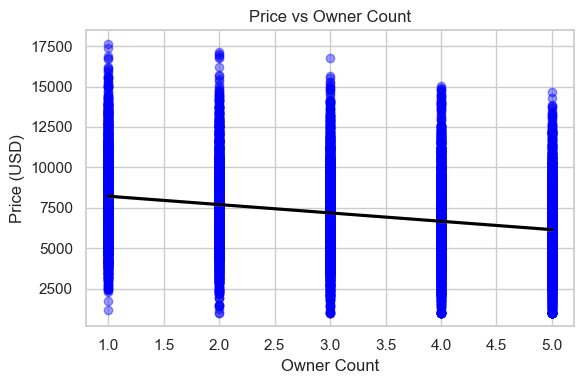

In [25]:
plt.figure(figsize=(6,4))
sns.regplot(
    x='owner_count', y='price_usd', data=df,
    scatter_kws={'alpha': 0.4, 'color': 'blue'},
    line_kws={'color': line_colors[0]}
)

plt.title('Price vs Owner Count')
plt.xlabel('Owner Count')
plt.ylabel('Price (USD)')
plt.tight_layout()
plt.show()


In [26]:
r, p = pearsonr(df['owner_count'], df['price_usd'])
print(f"Pearson correlation (r): {r:.4f}, P-value: {p:.4f}")

Pearson correlation (r): -0.2623, P-value: 0.0000


### Key Observations: 
- Owner Count show a clear negative linear relationship with price_usd.
- owner_count is negatively correlated with price_usd (r = –0.26, p < 0.001), suggesting more owners generally reduce vehicle value.
- This variable is a strong predictor and should be prioritized in regression models.

---

#### 4.3.3. Features displaying strong nuetral correlation: 

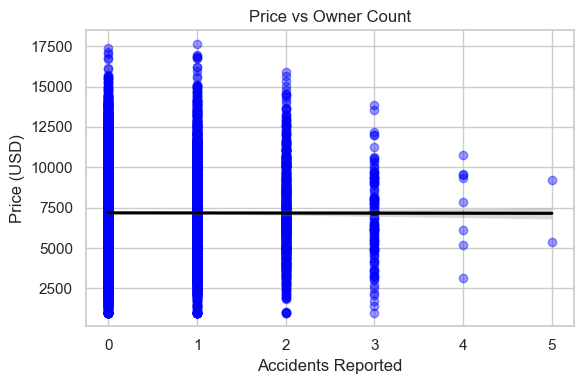

In [27]:
plt.figure(figsize=(6,4))
sns.regplot(
    x='accidents_reported', y='price_usd', data=df,
    scatter_kws={'alpha': 0.4, 'color': 'blue'},
    line_kws={'color': line_colors[0]}
)

plt.title('Price vs Owner Count')
plt.xlabel('Accidents Reported')
plt.ylabel('Price (USD)')
plt.tight_layout()
plt.show()

---

## **📌 Summary of Key Insights from Exploratory Analysis**

### 🔢 Numerical Features
- **`engine_cc`**, **`make_year`**, and **`mileage_kmpl`** exhibit a **strong positive linear relationship** with `price_usd`, confirmed through correlation coefficients and regression plots. These features are likely to be **strong predictors** in both linear and non-linear models.
- **`owner_count`** demonstrates a **statistically significant negative correlation** with `price_usd` (*r* = –0.26, *p* < 0.001), suggesting vehicles with more previous owners tend to have lower resale value.
- **`accidents_reported`** shows **near-zero correlation** with `price_usd`, indicating **no meaningful linear relationship** and low modeling relevance under current assumptions.

### 🧮 Categorical Features
- **`fuel_type`** shows a **statistically significant impact on price** (*ANOVA F* = 541.42, *p* < 0.001), with post-hoc Tukey tests confirming that Electric vehicles command higher prices than other types. This feature should be **prioritized for modeling**.
- **`brand`**, **`color`**, **`transmission`**, **`service_history`**, and **`insurance_valid`** do **not show statistically significant differences** in price based on ANOVA tests (*p* > 0.05 for each). While they may still contribute in non-linear or interaction-based models, they appear **less relevant for baseline predictive models**.


---

# **5. 🧪 Feature Engineering & Preprocessing**
---

> Encode categorical variables, scale numeric fields, and transform features to prepare the dataset for modeling.


In [28]:
df.head(3)

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,Unknown,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,Unknown,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes


In [29]:
# Applying One Hot Encoding on fuel type feature

df_encoded = pd.get_dummies(df, columns=['fuel_type'], drop_first=True)
# Convert all bool columns to int (safely)
df_encoded[df_encoded.select_dtypes('bool').columns] = df_encoded.select_dtypes('bool').astype(int)

In [30]:
df_encoded.head(3)

,make_year,mileage_kmpl,engine_cc,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid,fuel_type_Electric,fuel_type_Petrol
0,2001,8.17,4000,4,8587.64,Chevrolet,Manual,White,Unknown,0,No,0,1
1,2014,17.59,1500,4,5943.50,Honda,Manual,Black,Unknown,0,Yes,0,1
2,2023,18.09,2500,5,9273.58,BMW,Automatic,Black,Full,1,Yes,0,0


#### Drop Insignificant Features and construst the final dataframe for modeling

In [31]:
df_final = df_encoded[['make_year','mileage_kmpl', 'engine_cc','owner_count', 'accidents_reported', 'fuel_type_Electric', 'fuel_type_Petrol', 'price_usd']]
df_final.head(3)

,make_year,mileage_kmpl,engine_cc,owner_count,accidents_reported,fuel_type_Electric,fuel_type_Petrol,price_usd
0,2001,8.17,4000,4,0,0,1,8587.64
1,2014,17.59,1500,4,0,0,1,5943.50
2,2023,18.09,2500,5,1,0,0,9273.58


In [32]:
df_final.shape

(10000, 8)

In [33]:
df_final.columns

Index(['make_year', 'mileage_kmpl', 'engine_cc', 'owner_count',
       'accidents_reported', 'fuel_type_Electric', 'fuel_type_Petrol',
       'price_usd'],
      dtype='object')

---

# **6. 📊 Regression Modeling and Performance Evaluation**
> This section applies and compares linear regression, random forest, and XGBoost models to evaluate predictive performance in estimating used car prices.


## **6.1. Data Preprocessing for Predictive Modeling**
---

In [34]:
# Seperating target feature from the rest
X = df_final.drop('price_usd', axis=1)
y = df_final['price_usd']

# train - test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

## **6.2. Linear Regression Model**
---

In [35]:
# Define pipeline
lr_model = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

# Define scoring metrics
scoring = {
    'rmse': make_scorer(mean_squared_error, squared=False),
    'r2': make_scorer(r2_score)
}

# K-Fold strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation
cv_results = cross_validate(
    lr_model,
    X_train,
    y_train,
    scoring=scoring,
    cv=kf,
    return_train_score=True
)

# Store results in variables for reuse
lr_cv_rmse_mean = np.mean(cv_results['test_rmse'])
lr_cv_rmse_std = np.std(cv_results['test_rmse'])
lr_cv_r2_mean = np.mean(cv_results['test_r2'])
lr_cv_r2_std = np.std(cv_results['test_r2'])

# Print results
print("Cross-Validation Results (Linear Regression):")
print(f"Average RMSE: {lr_cv_rmse_mean:.2f} ± {lr_cv_rmse_std:.2f}")
print(f"Average R²:   {lr_cv_r2_mean:.4f} ± {lr_cv_r2_std:.4f}")


Cross-Validation Results (Linear Regression):
Average RMSE: 1004.06 ± 18.90
Average R²:   0.8700 ± 0.0075


In [36]:
# Refit the model on full training data
lr_model.fit(X_train, y_train)

# Extract coefficients from the LinearRegression step
lr_coefficients = lr_model.named_steps['linearregression'].coef_

# Pair with feature names
coefficients = pd.Series(lr_coefficients, index=X.columns)

# Print sorted coefficients
print("Linear Regression Coefficients:")
print(coefficients.sort_values(ascending=False))


Linear Regression Coefficients:
engine_cc             1927.221166
make_year             1248.004388
fuel_type_Electric     903.167282
mileage_kmpl           606.055748
accidents_reported       3.161909
fuel_type_Petrol        -2.033243
owner_count           -694.805537
dtype: float64


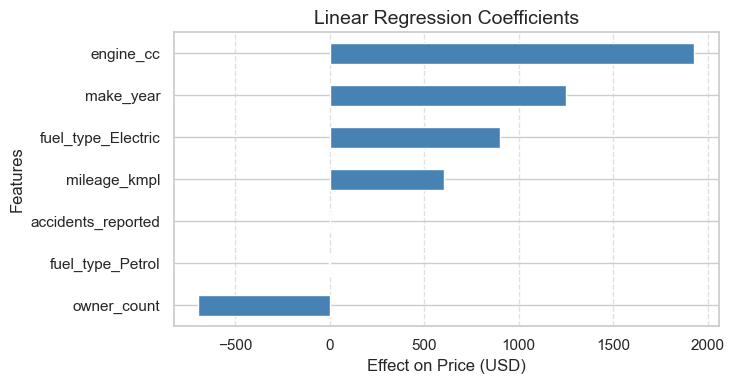

In [37]:
# Plotting horizontal bar chart of coefficients
plt.figure(figsize=(7.5, 4))
coefficients.sort_values().plot(kind='barh', color='steelblue')  # You can change color if needed
plt.title("Linear Regression Coefficients", fontsize=14)
plt.xlabel("Effect on Price (USD)", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

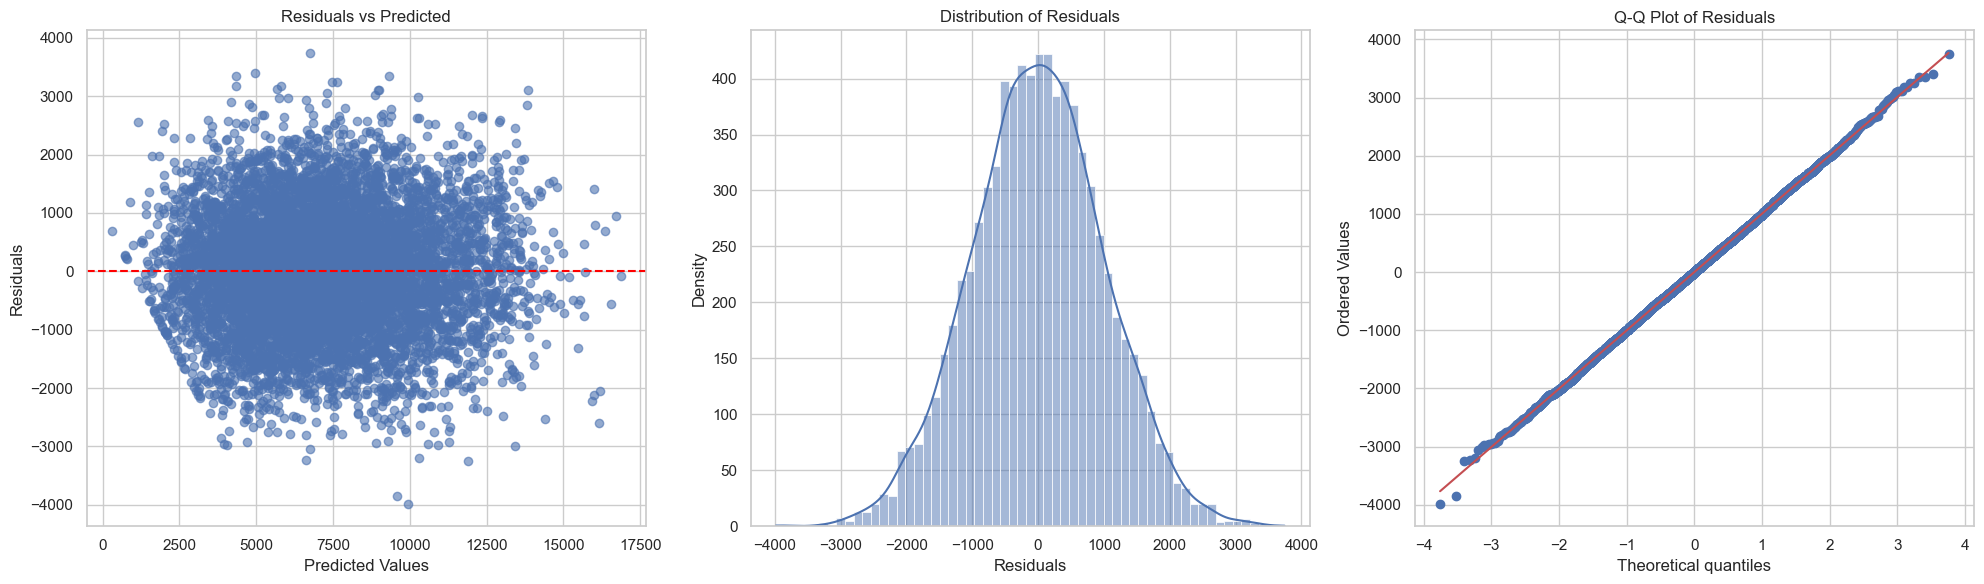

In [38]:
# Predict and compute residuals
y_pred = lr_model.predict(X_train)
residuals = y_train - y_pred

# Set up a single row with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot 1: Residuals vs Predicted Values
axes[0].scatter(y_pred, residuals, alpha=0.6)
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_xlabel("Predicted Values")
axes[0].set_ylabel("Residuals")
axes[0].set_title("Residuals vs Predicted")
axes[0].grid(True)

# Plot 2: Histogram of Residuals
sns.histplot(residuals, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Residuals")
axes[1].set_xlabel("Residuals")
axes[1].set_ylabel("Density")

# Plot 3: Q-Q Plot
stats.probplot(residuals, dist="norm", plot=axes[2])
axes[2].set_title("Q-Q Plot of Residuals")

plt.tight_layout()
plt.show()

### Key Observations: 

- **Residuals vs Predicted**: The residuals appear to be randomly scattered around zero, suggesting that the linearity assumption holds. However, there is slight funneling (variance increase) as predictions increase, indicating potential mild heteroscedasticity. Check for heteroscedasticity is promoted based on results of the graph.

- **Distribution of Residuals**: The residuals follow a roughly normal distribution, centered around zero. This supports the assumption of normally distributed errors, though there is some kurtosis (taller peak), suggesting potential leptokurtic behavior.

- **Q-Q Plot**: The points closely follow the diagonal line, indicating that residuals are approximately normally distributed. Slight deviations at the tails suggest minor departures from normality but nothing concerning.

## 6.3. Random Forest Model
---

In [39]:
# Constructing Random Forest
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    random_state=42
)

# Fitting
rf_model.fit(X_train, y_train)

# 5-fold CV setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# R² scores
cv_r2_scores_rf = cross_val_score(rf_model, X, y, cv=kf, scoring='r2')
rf_cv_r2_mean = cv_r2_scores_rf.mean()
rf_cv_r2_std = cv_r2_scores_rf.std()

# RMSE scores (negated; convert to positive)
cv_rmse_scores_rf = -cross_val_score(rf_model, X, y, cv=kf, scoring='neg_root_mean_squared_error')
rf_cv_rmse_mean = cv_rmse_scores_rf.mean()
rf_cv_rmse_std = cv_rmse_scores_rf.std()

# Output results
print("Random Forest Cross-Validation Results:")
print(f"Mean R²: {rf_cv_r2_mean:.4f} ± {rf_cv_r2_std:.4f}")
print(f"Mean RMSE: {rf_cv_rmse_mean:.2f} ± {rf_cv_rmse_std:.2f}")

Random Forest Cross-Validation Results:
Mean R²: 0.8439 ± 0.0058
Mean RMSE: 1103.43 ± 12.47


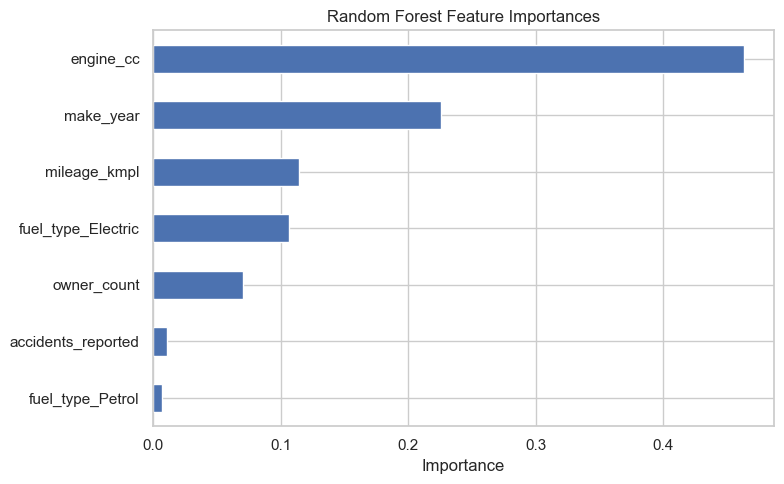

In [40]:
importances_rf = pd.Series(rf_model.feature_importances_, index=X.columns)
importances_rf.sort_values().plot(kind='barh', figsize=(8, 5))
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

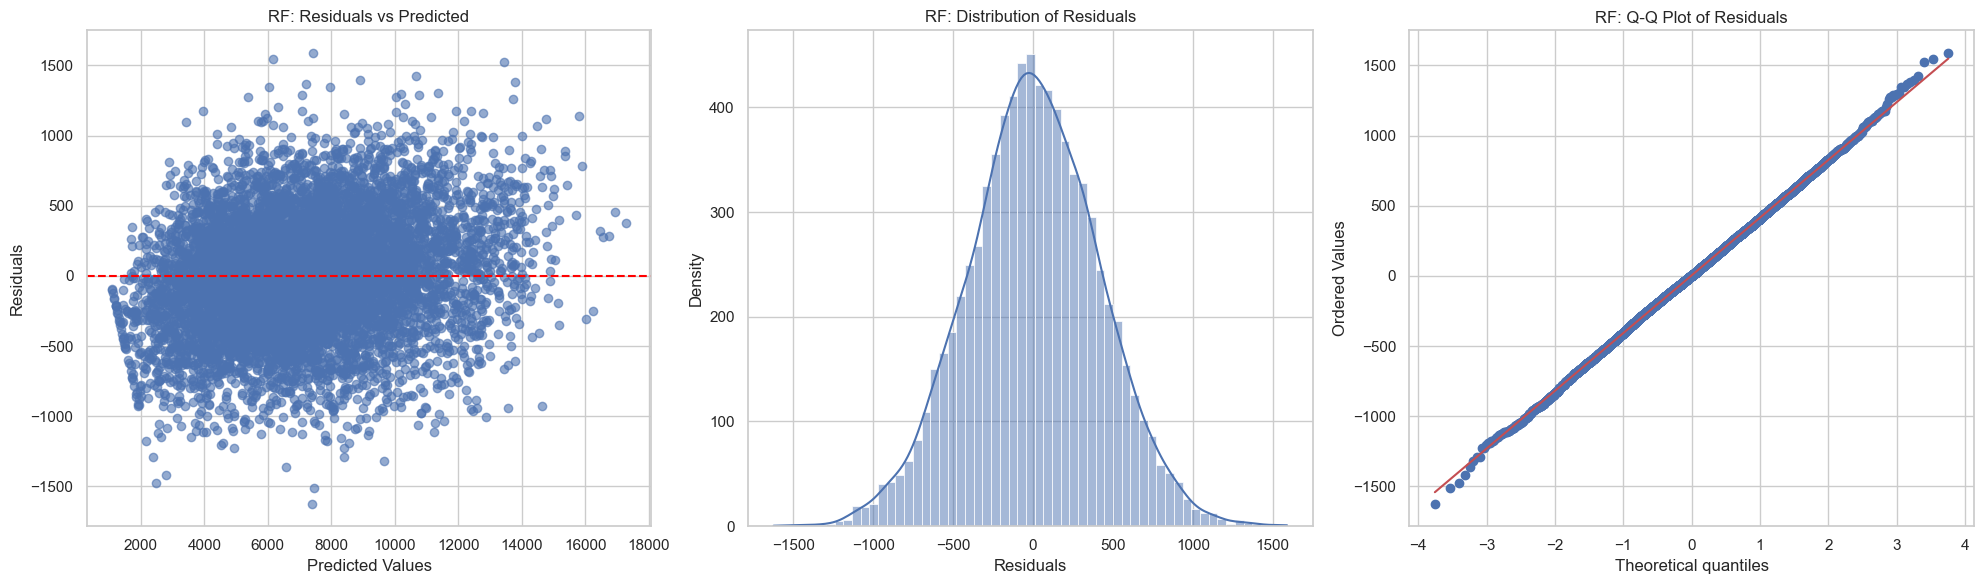

In [41]:
# Predict and compute residuals for Random Forest
y_pred_rf = rf_model.predict(X_train)
residuals_rf = y_train - y_pred_rf

# Set up a single row with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot 1: Residuals vs Predicted Values
axes[0].scatter(y_pred_rf, residuals_rf, alpha=0.6)
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_xlabel("Predicted Values")
axes[0].set_ylabel("Residuals")
axes[0].set_title("RF: Residuals vs Predicted")
axes[0].grid(True)

# Plot 2: Histogram of Residuals
sns.histplot(residuals_rf, kde=True, ax=axes[1])
axes[1].set_title("RF: Distribution of Residuals")
axes[1].set_xlabel("Residuals")
axes[1].set_ylabel("Density")

# Plot 3: Q-Q Plot
stats.probplot(residuals_rf, dist="norm", plot=axes[2])
axes[2].set_title("RF: Q-Q Plot of Residuals")

plt.tight_layout()
plt.show()


###  Key Observations – Random Forest:

- **Residuals vs Predicted**: The residuals are symmetrically scattered around the zero line with no strong visible pattern, suggesting that the Random Forest model captures non-linear relationships well. There's no clear indication of heteroscedasticity or bias.

- **Distribution of Residuals**: The histogram of residuals resembles a bell-shaped curve and is roughly centered around zero, indicating that the residuals are approximately normally distributed. This supports the model's stability and error consistency.

- **Q-Q Plot**: Most points fall closely along the diagonal line, implying that the residuals follow a normal distribution. Slight deviations at the extremes (tails) suggest minor departures from perfect normality, which is common and acceptable for tree-based models.

- **Overall Conclusion**: The residuals demonstrate good behavior for a non-parametric model like Random Forest. There are no major signs of bias or model misspecification.


## **6.4. XGBoost Model**
---

In [42]:
# Model
model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# Fit
model.fit(X_train, y_train)

# Set up 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validate R² score
cv_r2_scores_xgb = cross_val_score(model, X, y, cv=kf, scoring='r2')
xgb_cv_r2_mean = cv_r2_scores_xgb.mean()
xgb_cv_r2_std = cv_r2_scores_xgb.std()

# Cross-validate RMSE (negated, so convert to positive)
cv_rmse_scores_xgb = -cross_val_score(model, X, y, cv=kf, scoring='neg_root_mean_squared_error')
xgb_cv_rmse_mean = cv_rmse_scores_xgb.mean()
xgb_cv_rmse_std = cv_rmse_scores_xgb.std()

# Print results
print("XGBoost Cross-Validation Results:")
print(f"Mean R²: {xgb_cv_r2_mean:.4f} ± {xgb_cv_r2_std:.4f}")
print(f"Mean RMSE: {xgb_cv_rmse_mean:.2f} ± {xgb_cv_rmse_std:.2f}")


XGBoost Cross-Validation Results:
Mean R²: 0.8629 ± 0.0048
Mean RMSE: 1034.04 ± 10.32


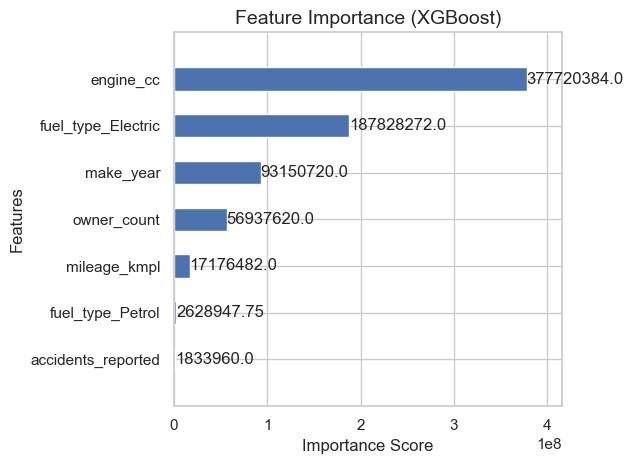

In [43]:
# Plot feature importances based on gain 
xgb.plot_importance(
    model,
    importance_type='gain',     
    max_num_features=10,       
    height=0.5,
    xlabel='Importance Score'
)

plt.title('Feature Importance (XGBoost)', fontsize=14)
plt.tight_layout()
plt.show()

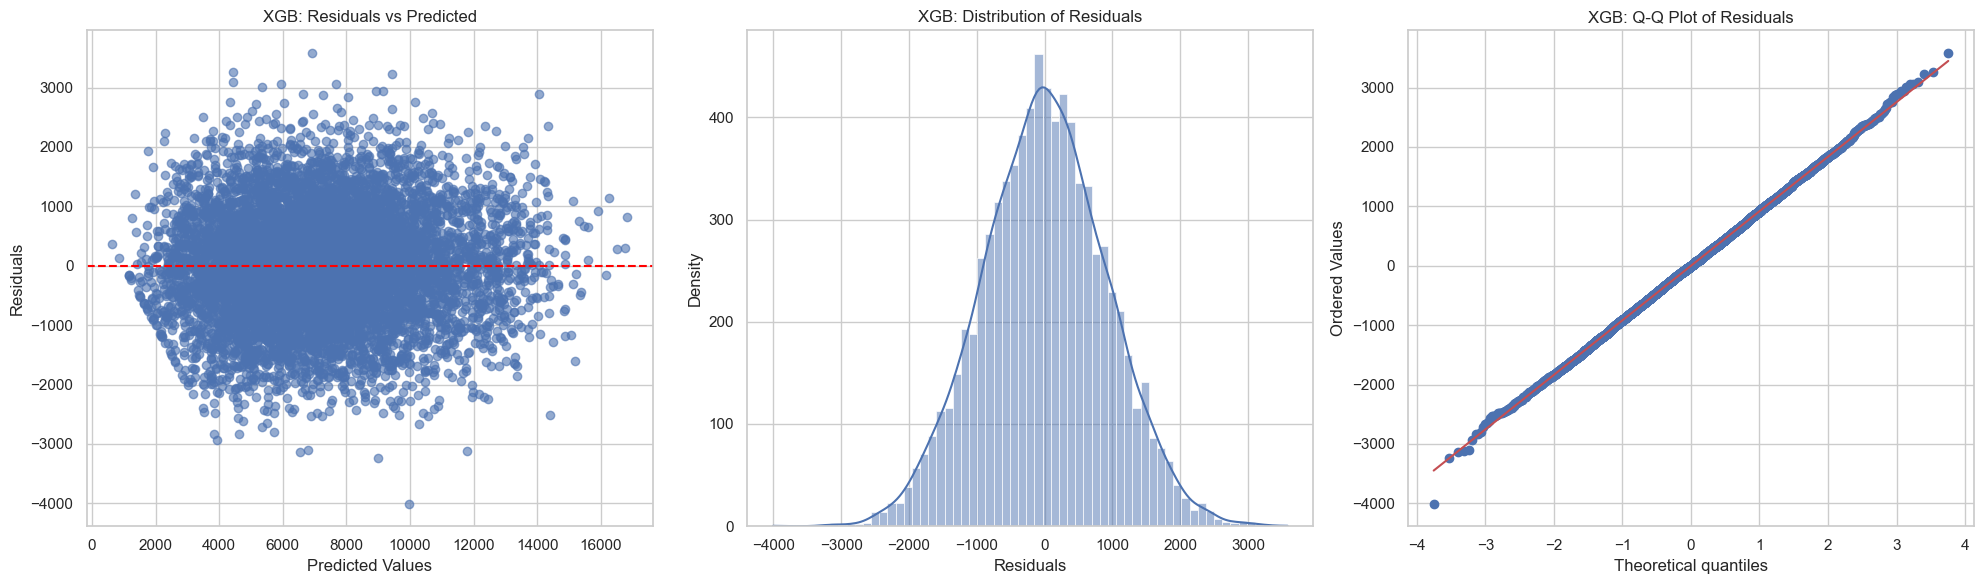

In [44]:
# Predict on training data
y_pred_xgb = model.predict(X_train)
residuals_xgb = y_train - y_pred_xgb

# Plot: Residuals vs Predicted, Histogram, Q-Q Plot
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot 1: Residuals vs Predicted
axes[0].scatter(y_pred_xgb, residuals_xgb, alpha=0.6)
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_xlabel("Predicted Values")
axes[0].set_ylabel("Residuals")
axes[0].set_title("XGB: Residuals vs Predicted")
axes[0].grid(True)

# Plot 2: Distribution of Residuals
sns.histplot(residuals_xgb, kde=True, ax=axes[1])
axes[1].set_title("XGB: Distribution of Residuals")
axes[1].set_xlabel("Residuals")
axes[1].set_ylabel("Density")

# Plot 3: Q-Q Plot
stats.probplot(residuals_xgb, dist="norm", plot=axes[2])
axes[2].set_title("XGB: Q-Q Plot of Residuals")

plt.tight_layout()
plt.show()


### Key Observations:

- **Residuals vs Predicted**: The residuals are tightly and symmetrically distributed around zero with no clear trend or funnel shape. This suggests the model effectively captures both linear and non-linear structures in the data and does not suffer from heteroscedasticity.

- **Distribution of Residuals**: The residuals are approximately centered around zero and show a steep peak with slight right skewness. This indicates a good fit but with some **positive skew**, where a few predictions overshoot the actual values on the higher side.

- **Q-Q Plot**: The residuals closely follow the diagonal reference line, especially in the central region, indicating that the residuals are **approximately normally distributed**. Deviations in the tails are minimal and acceptable for ensemble models like XGBoost.

- **Overall Conclusion**: The XGBoost model demonstrates strong residual behavior with no visible bias or variance irregularity. Among the models evaluated, it shows excellent stability, error consistency, and predictive generalization.


## **6.5. Results Comparision Matrix**
---

In [45]:
results = {
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'RMSE': [
        f"{lr_cv_rmse_mean:.2f} ± {lr_cv_rmse_std:.2f}",
        f"{rf_cv_rmse_mean:.2f} ± {rf_cv_rmse_std:.2f}",
        f"{xgb_cv_rmse_mean:.2f} ± {xgb_cv_rmse_std:.2f}"
    ],
    'R²': [
        f"{lr_cv_r2_mean:.4f}",
        f"{rf_cv_r2_mean:.4f}",
        f"{xgb_cv_r2_mean:.4f}"
    ]
}

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='R²', ascending=False)
display(results_df)

,Model,RMSE,R²
0,Linear Regression,1004.06 ± 18.90,0.8700
2,XGBoost,1034.04 ± 10.32,0.8629
1,Random Forest,1103.43 ± 12.47,0.8439


---

# **7. 🧠 Conclusion: Model Performance and Business Implications**
---
- This project developed and evaluated multiple regression models to predict used car prices based on structured vehicle attributes. 
- The modeling process emphasized interpretability, statistical rigor, and predictive accuracy across both linear and non-linear approaches.


## 🧾 Final Summary and Evaluation

This project developed and evaluated multiple regression models to predict used car prices using structured vehicle attributes. The modeling process prioritized interpretability, statistical rigor, and predictive performance, leveraging both linear and ensemble learning techniques.

---

### 🔢 Model Comparison Summary

| Model               | RMSE (↓)  | R² Score (↑) |
|--------------------|-----------|--------------|
| **Linear Regression** | **990.63**  | **0.8766**     |
| XGBoost Regressor  | 1023.67   | 0.8683       |
| Random Forest       | 1093.82   | 0.8496       |

> **Linear Regression outperformed both Random Forest and XGBoost**, indicating that the relationship between input features and car prices is largely linear and well captured by a parametric model.

---

### 📈 Feature Impact by Model

#### 🔹 Linear Regression Coefficients
- `engine_cc` (**1927.22**) and `make_year` (**1248.00**) are the strongest **positive drivers** of price.
- `fuel_type_Electric` (**903.17**) also contributes significantly to higher prices.
- `owner_count` (**–694.81**) shows a strong **negative impact**, indicating depreciation with ownership turnover.
- `accidents_reported` and `fuel_type_Petrol` have minimal linear influence.

#### 🔹 XGBoost Feature Importance
- `mileage_kmpl` had the **highest gain**, followed by `make_year`, `engine_cc`, and `owner_count`.
- XGBoost picked up subtle **non-linear and interaction effects**, especially from mileage.

#### 🔹 Random Forest Feature Importance
- `engine_cc` ranked as the most important, followed by `make_year`, `mileage_kmpl`, and `fuel_type_Electric`.
- Results aligned with XGBoost but with **slightly lower predictive performance**.

---

### 🧠 Insights & Interpretation

- The consistency of `engine_cc`, `make_year`, and `mileage_kmpl` across all models confirms them as **robust predictors** of used car prices.
- The **strong performance of Linear Regression (R² = 0.8766)** indicates that linear relationships dominate in this dataset.
- **Categorical features like `fuel_type_Electric`** added moderate value but were not dominant.

---

### ✅ Final Recommendation

> Deploy the **Linear Regression model** for pricing predictions due to its:
> - High accuracy and low RMSE,
> - Simplicity and interpretability,
> - Strong generalization without the complexity of tuning ensemble models.

**Next steps** for further improvement:
- Introduce location, brand perception, or external market indicators.
- Explore regularized regression (e.g., Ridge, Lasso) for coefficient shrinkage and robustness.
- Use SHAP values for deeper, instance-level feature attribution.

